<a href="https://colab.research.google.com/github/riddhi-more/Diabetes-Prediction-Using-Binary-Classification/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


Classification

Supervised learning trains a model using labeled data, where input features (X) are used to predict an output label (y).

f([x₁, x₂, x₃, …]) = y

Classification is a supervised learning task where the model predicts the class an observation belongs to. In binary classification, the label has two possible values (0 or 1), such as Yes/No or Positive/Negative.

In this notebook, we use binary classification to predict whether a patient should be tested for diabetes based on medical data.

Load the Data

Download diabetes.csv from the link provided.

Upload the file using the Upload Data option.

Run the next cell to load the dataset.

Citation: Dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases.

In [2]:
drive.mount('/content/drive')
%ls  "/content/drive/My Drive/ML"

Mounted at /content/drive
diabetes.csv  diabetes.ipynb


In [ ]:
import pandas as pd

# load the training dataset

diabetes = pd.read_csv('/content/drive/My Drive/ML/diabetes.csv')
print(diabetes.head())

   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  


In [ ]:
import pandas as pd

# load the training dataset
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.head())

**Understanding the Dataset**

This dataset contains medical and diagnostic details of patients who have been tested for diabetes. If needed, scroll horizontally to view all the columns. The last column, Diabetic, represents the test result:

0 → Patient tested negative for diabetes

1 → Patient tested positive for diabetes

This Diabetic column is the target label that our machine learning model will learn to predict. All the other columns—such as Pregnancies, PlasmaGlucose, DiastolicBloodPressure, and similar measurements—are the features that provide the input information for making this prediction.

To prepare the data for training, we separate it into:

X → the feature set (input variables)

y → the label (Diabetic outcome)

In [ ]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [np.float64(0.0), np.float64(171.0), np.float64(80.0), np.float64(34.0), np.float64(23.0), np.float64(43.50972593), np.float64(1.213191354), np.float64(21.0)] 
  Label: 0
Patient 2 
  Features: [np.float64(8.0), np.float64(92.0), np.float64(93.0), np.float64(47.0), np.float64(36.0), np.float64(21.24057571), np.float64(0.158364981), np.float64(23.0)] 
  Label: 0
Patient 3 
  Features: [np.float64(7.0), np.float64(115.0), np.float64(47.0), np.float64(52.0), np.float64(35.0), np.float64(41.51152348), np.float64(0.079018568), np.float64(23.0)] 
  Label: 0
Patient 4 
  Features: [np.float64(9.0), np.float64(103.0), np.float64(78.0), np.float64(25.0), np.float64(304.0), np.float64(29.58219193), np.float64(1.282869847), np.float64(43.0)] 
  Label: 1


Now let's compare the feature distributions for each label value.

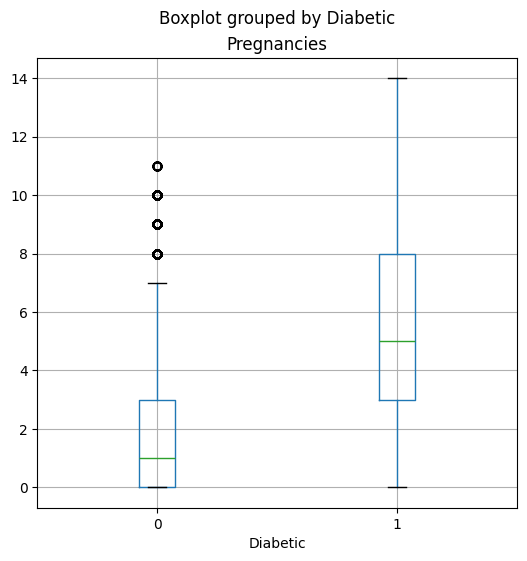

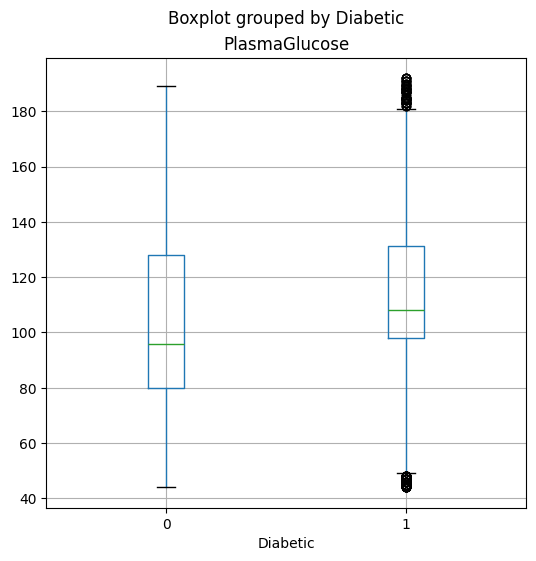

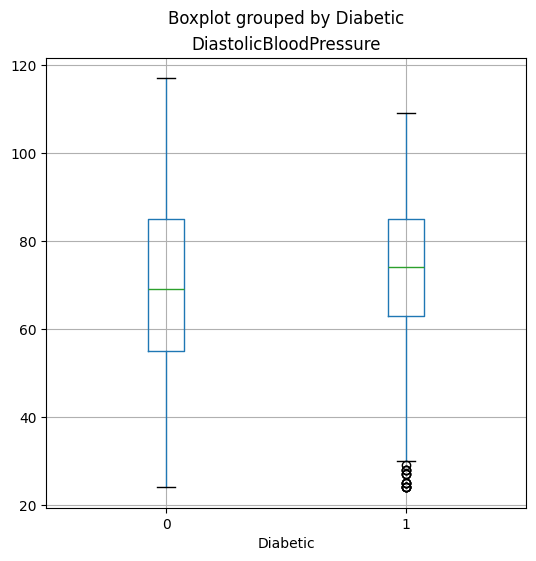

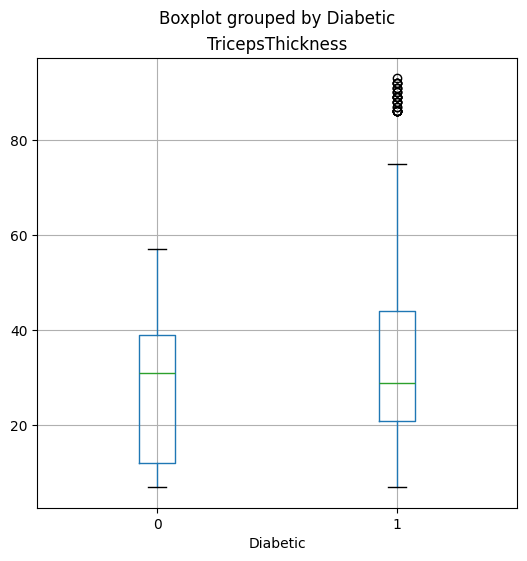

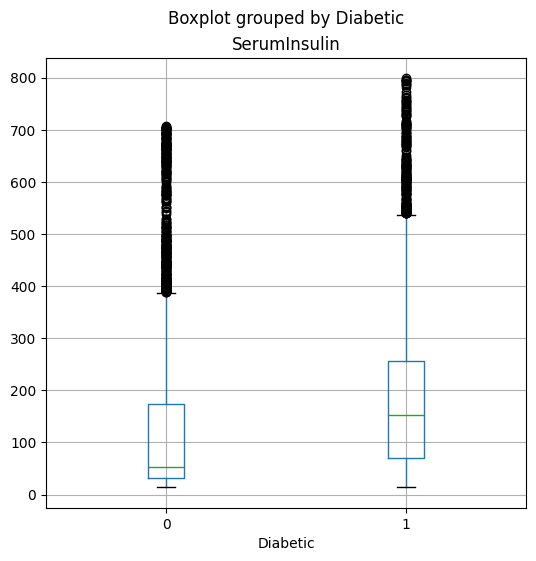

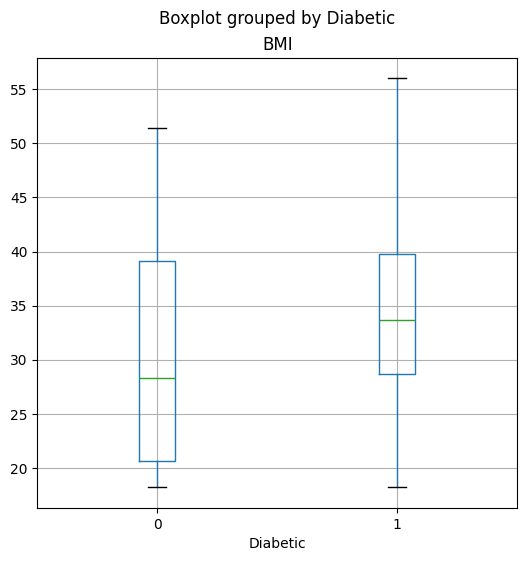

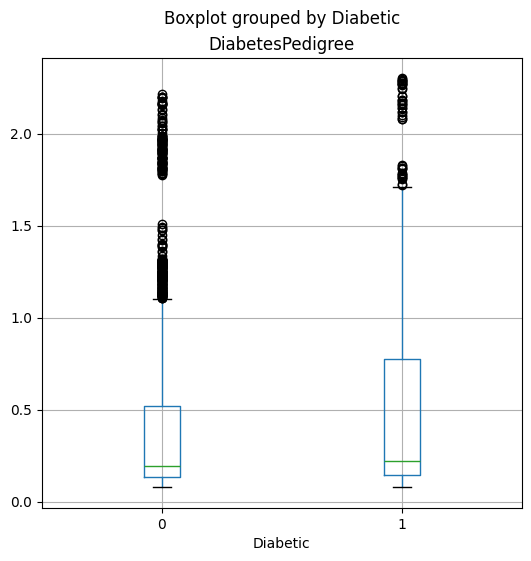

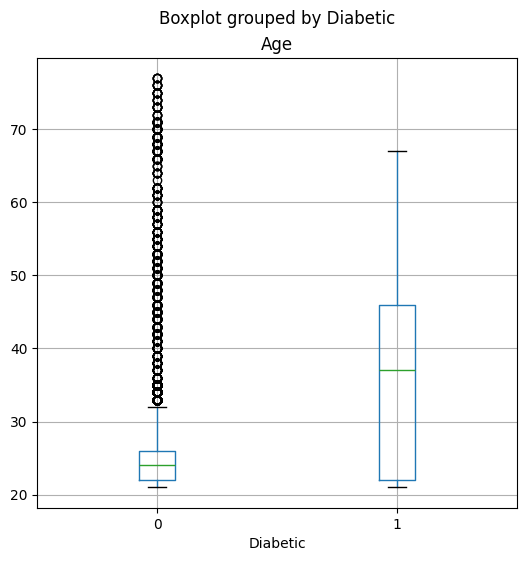

In [ ]:
from matplotlib import pyplot as plt

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

For some of the features, there's a noticeable difference in the distribution for each label value. In particular, **Pregnancies** and **Age** show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

### Split the data

Our dataset includes known values for the label, so we can use this to train a classifier so that it finds a statistical relationship between the features and the label value - but how will we know if our model is any good? How do we know it will predict correctly when we use it with new data that it wasn't trained with? Well, we can take advantage of the fact we have a large dataset with known label values, use only some of it to train the model, and hold back some to test the trained model - enabling us to compare the predicted labels with the already known labels in the test set.

In Python, the **scikit-learn** package contains a large number of functions we can use to build a machine learning model - including a **train_test_split** function that ensures we get a statistically random split of training and test data. We'll use that to split the data into 70% for training and hold back 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


### Train and Evaluate a Binary Classification Model
We're now ready to train our model by fitting the training features (**X_train**) to the training labels (**y_train**). There are various algorithms we can use to train the model. In this example, we'll use *Logistic Regression*, which (despite its name) is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a *regularization* parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding *overfitting* the model to the training data.

> **Note**: Parameters for machine learning algorithms are generally referred to as *hyperparameters*. To a data scientist, *parameters* are values in the data itself - *hyperparameters* are defined externally from the data.

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Now that we've trained the model using the training data, we can use the test data we held back to evaluate how well it predicts. Again, **scikit-learn** can help us do this. Let's start by using the model to predict labels for our test set, and compare the predicted labels to the known labels:

In [ ]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


The arrays of labels are too long to be displayed in the notebook output, so we can only compare a few values. Even if we printed out all of the predicted and actual labels, there are too many of them to make this a sensible way to evaluate the model. Fortunately, **scikit-learn** has a few more tricks up its sleeve, and it provides some metrics that we can use to evaluate the model.

The first thing you might want to do is to check the *accuracy* of the predictions - that is, what proportion of the labels did the model predict correctly?

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7888888888888889


The accuracy is returned as a decimal value - a value of 1.0 would mean that the model got 100% of the predictions right, while an accuracy of 0.0 is, well, pretty useless!


## Summary

Here we prepared our data by splitting it into test and train datasets, and applied logistic regression - a way of applying binary labels to our data. Our model was able to predict whether patients had diabetes with what appears to be reasonable accuracy. But is this good enough? In the next notebook we will look at alternatives to accuracy that can be much more useful in machine learning.